# Connecting to GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

Installing the feature_engine module to do outlier treatment, duplicate feature removal and correlated feature removal

In [ ]:
!pip install feature_engine

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
import feature_engine as fe
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import time
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Reading required data files

The trainfile is the data containing the target variables, which is split into a train and test split- to train the model and then to test the classification. The Test-Without TARGET file is used to only predict the final output for Kaggle submission

In [ ]:
#Read training data file
trainfile = r'/content/drive/MyDrive/CIS508/SantanderClassification/Santander Customer Satisfaction - TRAIN.csv'
train_data = pd.read_csv(trainfile)

#Read validation data file, test file will be created as a split of the train data
validationfile = r'/content/drive/MyDrive/CIS508/SantanderClassification/Santander Customer Satisfaction - TEST-Without TARGET.csv'
validation_data = pd.read_csv(validationfile)

# Getting sense of the data

In [ ]:
#Looking at data shape
print(train_data.shape)
print(validation_data.shape)

(76020, 371)
(75818, 370)


In [ ]:
#Looking at a couple of train data rows
train_data.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


In [ ]:
#Looking at test data
validation_data.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [ ]:
#Looking at data stats
train_data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fceb01cafd0>]],
      dtype=object)

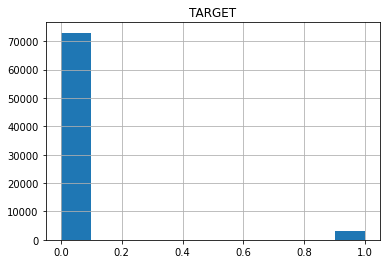

In [ ]:
# Checking the balance of dependent variable in the data recieved
train_data.hist(column='TARGET')

#This is a imbalanced class problem, evident from the graph below

In [ ]:
#Checking for null values in each column
(train_data.isnull().sum()*100/len(train_data)).sort_values(ascending = False)
#the dataset does not have any null values

ID                         0.0
imp_trasp_var17_in_ult1    0.0
ind_var7_emit_ult1         0.0
imp_venta_var44_ult1       0.0
imp_venta_var44_hace3      0.0
                          ... 
num_op_var40_hace3         0.0
num_op_var40_hace2         0.0
num_var25                  0.0
num_var25_0                0.0
TARGET                     0.0
Length: 371, dtype: float64

# Redundant Feature elimination and Feature Selection

Before getting into row tranformations for our data, let's eliminate variables that are not adding any value to the prediction and keep the ones that help predict the dependent variable

In [ ]:
# Detecting and removing variables that have almost no variance, as these will not be able to predict the customer satifaction
# Lets say variables with no variance are constant variables, the ones that we need to drop
from sklearn.feature_selection import VarianceThreshold
const_model = VarianceThreshold(threshold=0)
const_model.fit(train_data)

VarianceThreshold(threshold=0)

In [ ]:
# get_support() is a variable that indicates whether a variable is constant or not(0 for constant and 1 for not)
# Lets see how many and which variables are constant
print("Number of constant variables:",train_data.shape[1]-sum(const_model.get_support()))

print("Constant variables:")
[x for x in train_data.columns if x not in train_data.columns[const_model.get_support()]]

In [ ]:
# Dropping these variables from the train and validation sets
const_columns = [x for x in train_data.columns if x not in train_data.columns[const_model.get_support()]]
train_data = train_data.drop(columns = const_columns)
validation_data = validation_data.drop(columns = const_columns)
print("Train shape",train_data.shape)
print("Validation shape",validation_data.shape)

Train shape (76020, 337)
Validation shape (75818, 336)


# Data EDA + Transformation

**We're going to perform the following checks on the data as a combined process of cleaning it as well as understanding it. Transformation of data will be done as and when necessary.**

As noticed before, this dataset has a major class imbalance. We can either  under-sample majority class or over-sample minority class to extract good results from our model. Let's pick undersampling for now.

## Data Sampling

Of the multiple undersampling methods available, I'm using the Near Miss undersampling methods. There are 3 sub-types available within it: Near Miss-1, Near Miss-2, Near Miss-3. 

1. NearMiss-1: Majority class examples with minimum average distance to three 
closest minority class examples.
2. NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.
3. NearMiss-3: Majority class examples with minimum distance to each minority class example.

I'm choosing the NearMiss-3 method here as it yielded the best results after trying all 3

In [ ]:
# Creating the set of dependent and independent variables
X = train_data.drop(labels = "TARGET", axis = 1)
y = train_data["TARGET"]

In [ ]:
# Using the imblearn module python library, to undersample the data
!pip install imbalanced-learn
import imblearn

In [ ]:
from imblearn.under_sampling import NearMiss
# define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)

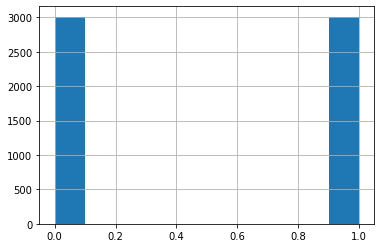

In [ ]:
y.hist()

The classes look pretty balanced now

Using train_data to do the following tranformations:
1. Drop duplicate and correlated features
2. Cap/drop outliers
3. Feature selection

In [ ]:
# Drop duplicate and correlated variables
from feature_engine.selection import DropDuplicateFeatures
from feature_engine.selection import DropCorrelatedFeatures

transformer = DropDuplicateFeatures()
transformer.fit(X)
X = transformer.transform(X)

tr = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.8)
X = tr.fit_transform(X)

X.shape

(6016, 93)

In [ ]:
# Selecting top features
from sklearn.feature_selection import SelectFromModel
fs = SelectFromModel(DecisionTreeClassifier(), max_features=30)

# performing train test split before we jump into model building
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 42)

# learn relationship from training data
fs.fit(X_train, y_train)

# transform train input data
feature_idx = fs.get_support()
feature_name = X_train.columns[feature_idx]
X_train = fs.transform(X_train)
X_train = pd.DataFrame(X_train, columns = feature_name)

# transform test input data
feature_idx2 = fs.get_support()
feature_name2 = X_test.columns[feature_idx2]
X_test = fs.transform(X_test)
X_test = pd.DataFrame(X_test, columns = feature_name2)

Looking at the correlation plot of the variables

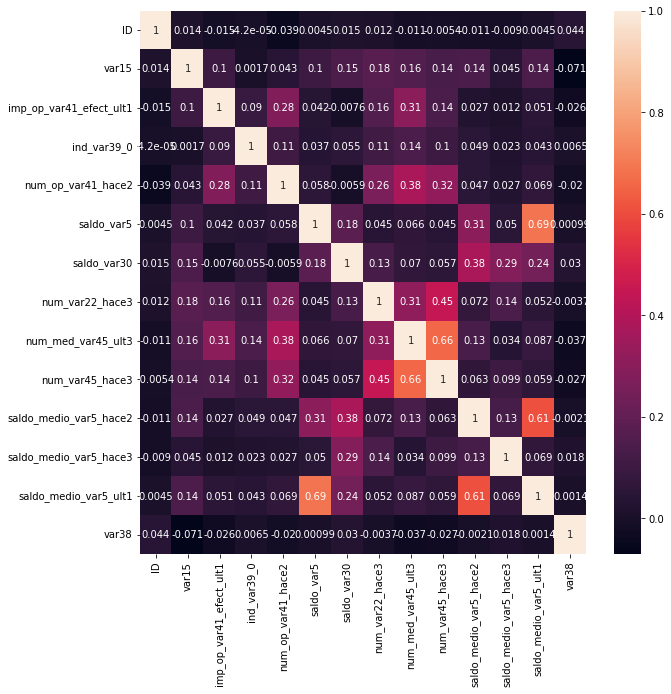

In [ ]:
corrmatrix = X_train.corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sn.heatmap(corrmatrix, annot=True)
plt.show()

We could also look at the pairplot of these for a clearer view

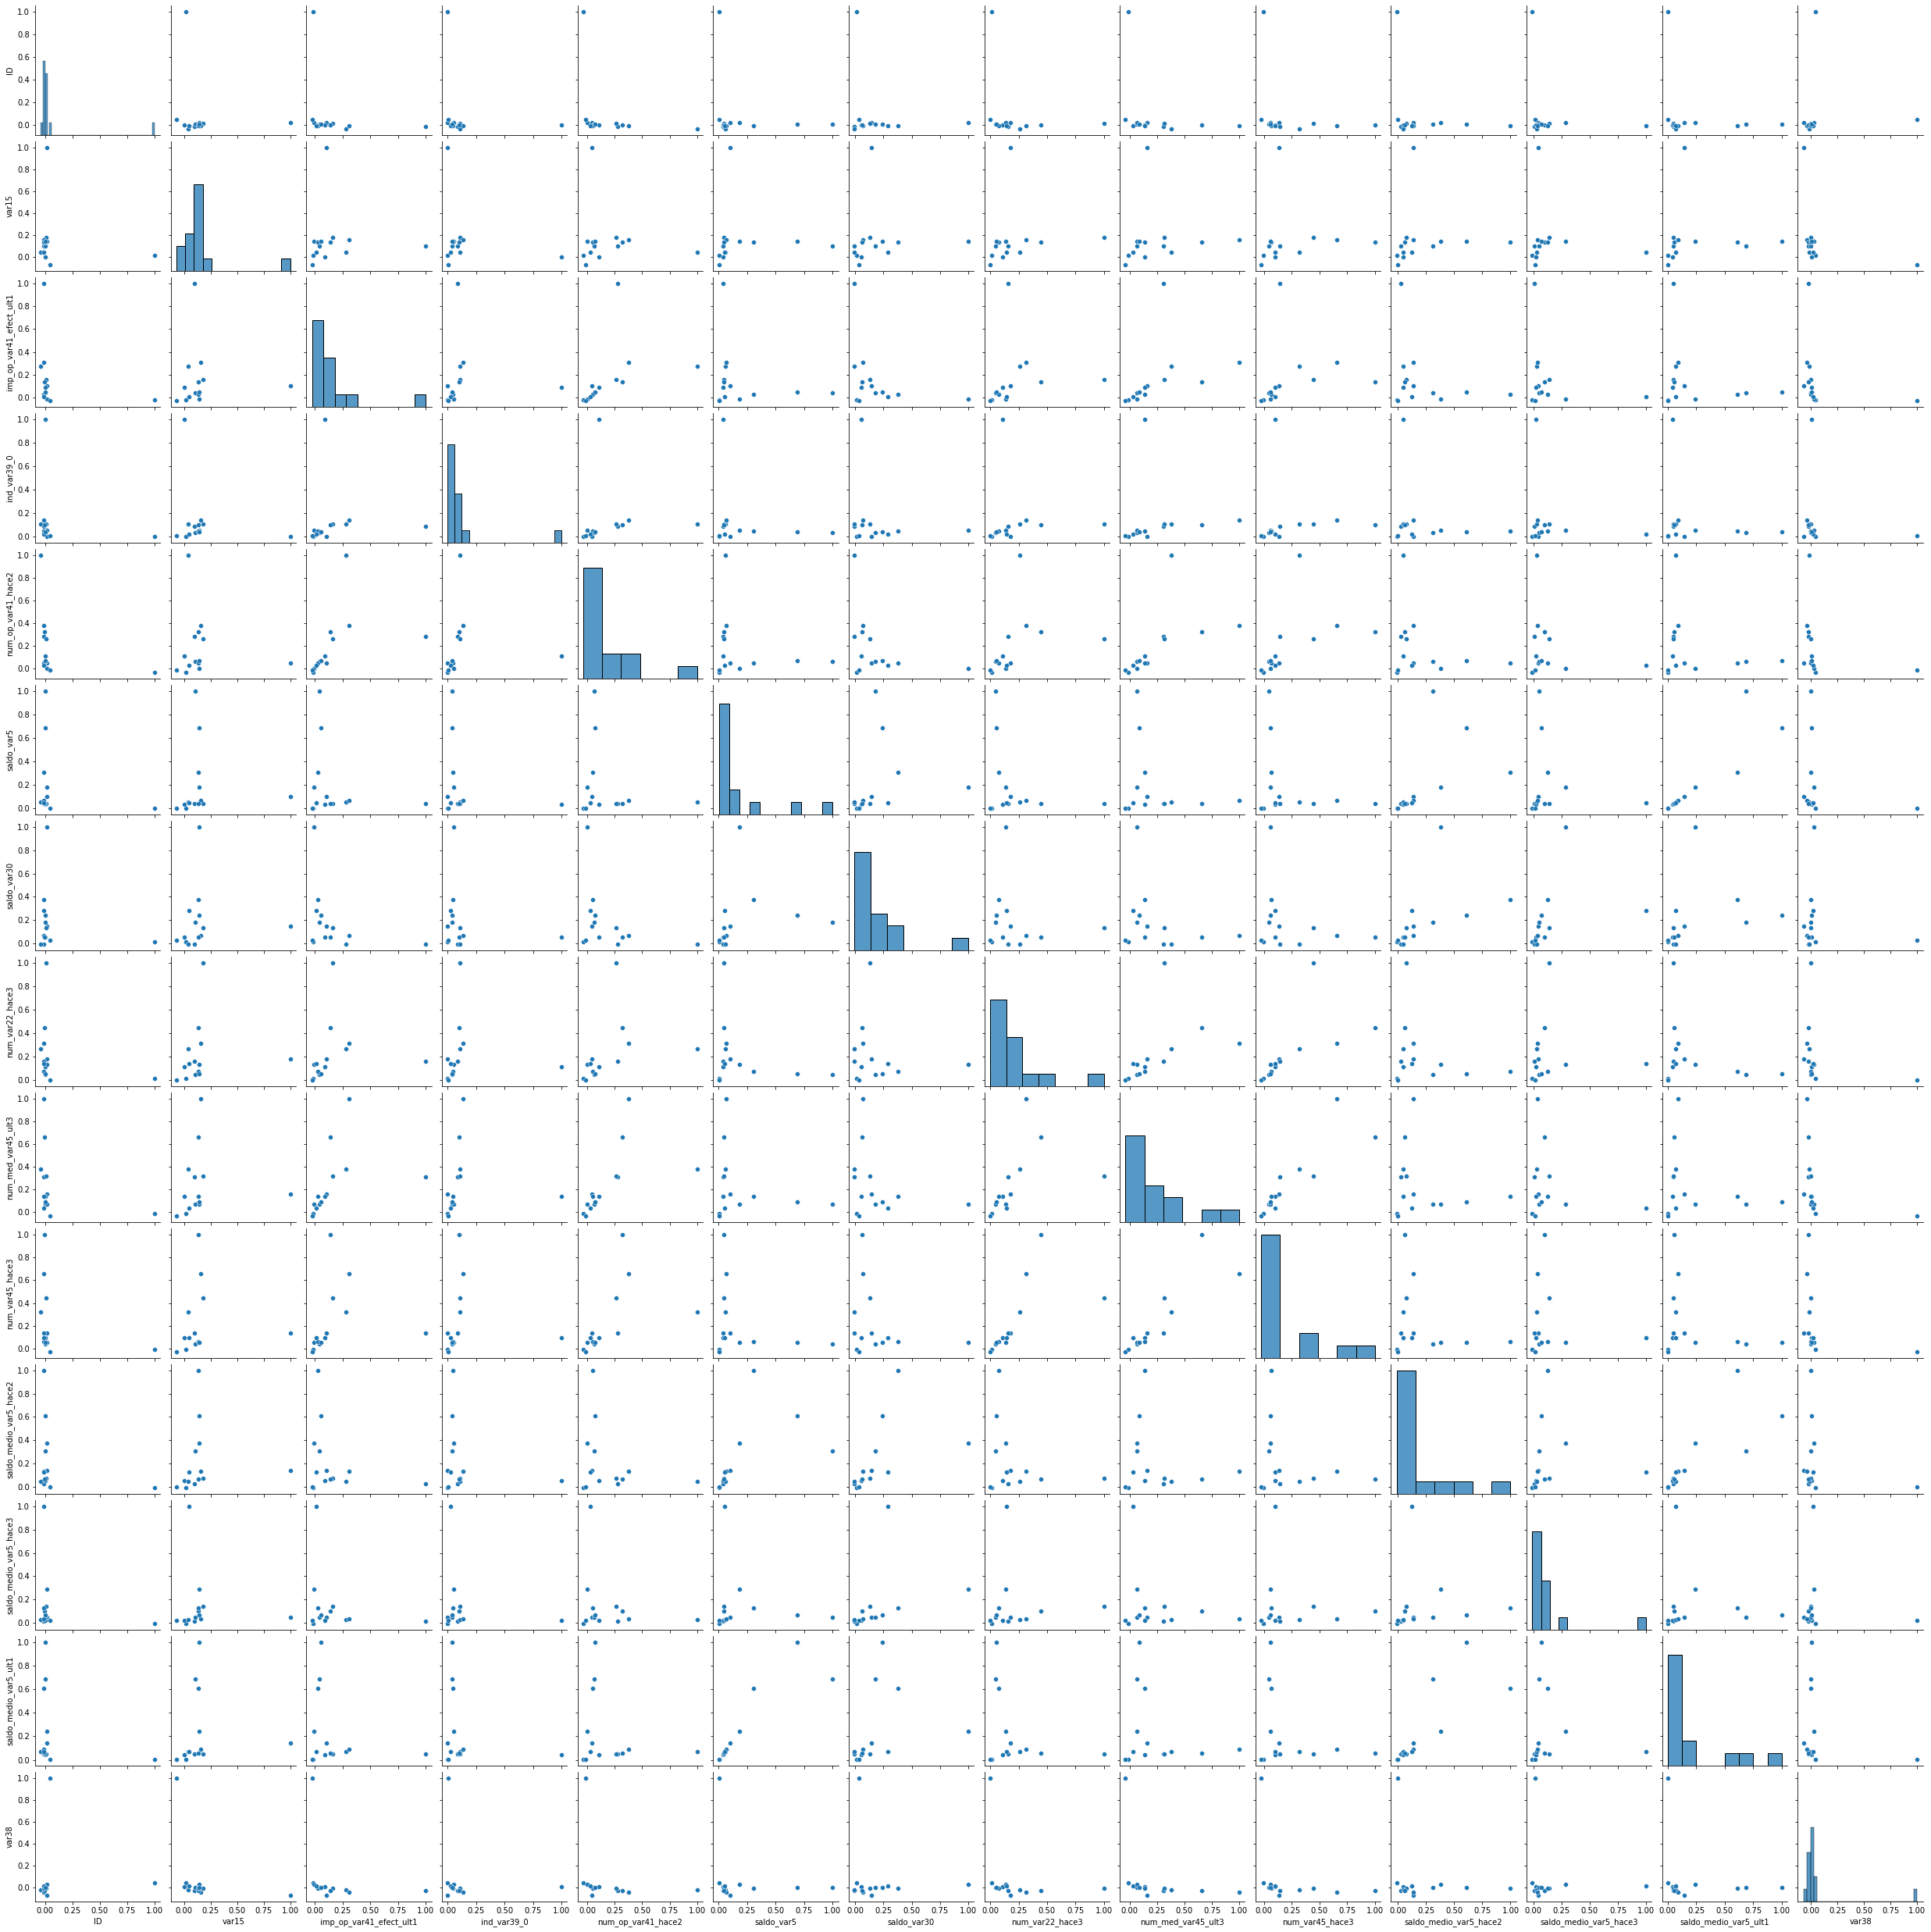

In [ ]:
sn.pairplot(corrmatrix, palette = 'pastel')

Checking variable importance ranks

Feature: 0, Score: 0.12761
Feature: 1, Score: 0.24172
Feature: 2, Score: 0.02613
Feature: 3, Score: 0.01727
Feature: 4, Score: 0.01459
Feature: 5, Score: 0.01998
Feature: 6, Score: 0.14289
Feature: 7, Score: 0.01544
Feature: 8, Score: 0.01081
Feature: 9, Score: 0.02605
Feature: 10, Score: 0.01690
Feature: 11, Score: 0.05599
Feature: 12, Score: 0.03861
Feature: 13, Score: 0.03374
Feature: 14, Score: 0.21226


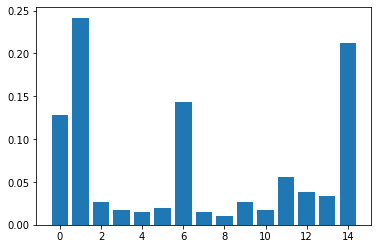

In [ ]:
# model to calculate variable importance
model = DecisionTreeClassifier()

# fit the model
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

**Hyperparameter Tuning**

We will do a hyperparameter tuning to select the best configuration for the model

In [ ]:
# Hyperparameter tuning to select the best model configuration

start_time = time.time() ## To check how long the tuning runs for, start of time
grid = {
    'max_depth': [15,20,25,30,40,50],
 'min_samples_leaf': [2,4,6,8,10,12],
 'min_samples_split': [5,10,12,14],
 "criterion": ["gini", "entropy"]
}

dt_class = DecisionTreeClassifier()

hp_tuning = GridSearchCV(estimator = dt_class, param_grid = grid, cv = 10) ## to try optimising for 'f1', 'roc_auc', 'balanced_accuracy','recall'

hp_tuning.fit(X_train, y_train)

best_params_dict = hp_tuning.best_params_

print(time.time()-start_time) ## To check how long the tuning runs for, end of time
print(best_params_dict)

107.64253258705139
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 5}


# Final Iteration of Model Build and Prediction on Test Data

In [ ]:
# Building model with the best parameters achieved from the hyperparameter tuning
dtree2 = DecisionTreeClassifier(min_samples_split = best_params_dict['min_samples_split']
           ,min_samples_leaf = best_params_dict['min_samples_leaf']
           ,max_depth = best_params_dict['max_depth']
           ,criterion = best_params_dict['criterion'])

dtree2.fit(X_train, y_train)
#tree.plot_tree(dtree2)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=10,
                       min_samples_split=5)

# Accuracy Check on Test data

In [ ]:
# Predicting on test data and checking validation metrics
y_pred = dtree2.predict(X_test)

print("Accuracy: ",round(accuracy_score(y_test,y_pred)*100,2),'%')
print("Precision: ",round(precision_score(y_test,y_pred)*100,2),'%')
print("Recall: ",round(recall_score(y_test,y_pred)*100,2),'%')

Accuracy:  72.81 %
Precision:  72.04 %
Recall:  71.74 %


There is a drastic improvement in the precision and recall once we undersample the majority class

# Prediction on validation data 

In [ ]:
val_cols = list(X_train.columns)
validation_data = validation_data[val_cols]

In [ ]:
# Predicting on validation data
validation_pred = dtree2.predict_proba(validation_data)
validation_pred = pd.DataFrame(validation_pred)

In [ ]:
# Creating the final output file
final_df = pd.DataFrame
final_df = validation_pred
final_df = pd.merge(validation_data['ID'],final_df,how = 'left',left_index = True, right_index = True)

Exporting the file

In [ ]:
from google.colab import files
final_df.to_csv('santander_validation.csv') 
files.download('santander_validation.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## RandomForest

**Hyperparameter Tuning**

We will do a hyperparameter tuning to select the best configuration for the model

In [ ]:
start_time = time.time()

grid = {
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

rf_class = RandomForestClassifier()

hp_tuning = RandomizedSearchCV(estimator = rf_class, param_distributions = grid, n_iter = 100)

hp_tuning.fit(X_train, y_train)

best_params_dict = hp_tuning.best_params_

print(time.time()-start_time)

Building the model

In [ ]:
dtree2 = RandomForestClassifier(n_estimators = best_params_dict['n_estimators']
            , min_samples_split = best_params_dict['min_samples_split']
           , min_samples_leaf = best_params_dict['min_samples_leaf'], max_features = best_params_dict['max_features'], 
           max_depth = best_params_dict['max_depth'])

dtree2.fit(X_train, y_train)

Predicting on test

In [ ]:
y_pred = dtree2.predict(X_test)

Model Accuracy Check

In [ ]:
print("Accuracy: ",round(accuracy_score(y_test,y_pred)*100,2),'%')
print("Precision: ",round(precision_score(y_test,y_pred)*100,2),'%')
print("Recall: ",round(recall_score(y_test,y_pred)*100,2),'%')